In [2]:
import os
import struct
import numpy as np

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [3]:
train_data = list(read(dataset='training',path=os.getcwd()+'/'))

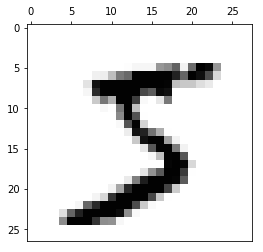

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
28


In [4]:
label, pixel = train_data[0]
show(pixel[0:27])
print pixel[0]
print len(pixel)

 <pre>
 1. Please download the data set and extract it to current directory
 2. Run the above cells you get the data in readable formate and pixel formate (60000 * 28 * 28), you can do operations on train_data
 3. Implement the PCA algorithm on the train data.
     i.   You can do the pricipal component analysis on smaller data &lt; 60000 (not less than 10k points) data points
     ii.  Plot the eigen values and eigen vectors
     iii. Find the varaince explained based on the eigen values we got in step (ii)
     iii. Select top two eigen values, corresponding eigen vectors and project the data points on those vectors
     iv.  Plot the resultent lower dimension points with hue="data_labels"
 4. Use the sklearn libraries pca function
     i.   Find out the amount of variance explained by each component, select the top components based on this result
     ii.  Transform the data into lower dimensional data
     iii. Plot the resultent lower dimension points with hue="data_labels"
 5. Compare the result of both step 3 and step 4
</pre>

/home/arunghontale/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


[  2.01625604e+04 +0.00000000e+00j  -9.01172976e+03 +0.00000000e+00j
   2.97932761e+03 +0.00000000e+00j   2.22723647e+03 +0.00000000e+00j
  -2.26256513e+03 +0.00000000e+00j  -2.06675579e+03 +0.00000000e+00j
   1.86407722e+03 +0.00000000e+00j  -1.73719225e+03 +0.00000000e+00j
  -1.62524618e+03 +0.00000000e+00j   1.63158020e+03 +0.00000000e+00j
  -1.42653111e+03 +0.00000000e+00j   1.48819273e+03 +0.00000000e+00j
   1.36847134e+03 +0.00000000e+00j   1.30034829e+03 +0.00000000e+00j
   1.18651636e+03 +0.00000000e+00j   1.12713675e+03 +0.00000000e+00j
   1.05130641e+03 +0.00000000e+00j   9.80343429e+02 +0.00000000e+00j
   9.38757115e+02 +0.00000000e+00j   9.18819772e+02 +0.00000000e+00j
  -1.30168767e+03 +0.00000000e+00j  -1.25133369e+03 +0.00000000e+00j
  -1.21915920e+03 +0.00000000e+00j  -1.08817381e+03 +0.00000000e+00j
  -1.05783016e+03 +0.00000000e+00j  -9.69492429e+02 +0.00000000e+00j
  -9.29657505e+02 +0.00000000e+00j  -9.05310494e+02 +0.00000000e+00j
   7.87746733e+02 +0.00000000e+00j

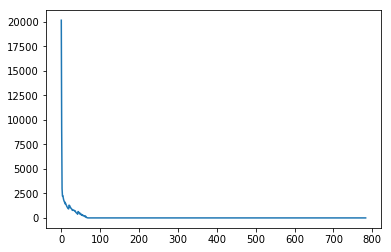

0
[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j
  0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j  0.+0.j -0.+0.j -0.-0.j
  0.+0.j  0.-0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j  0.+0.j
  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j  0.+0.j -0.+0.j -0.-0.j
  0.+0.j  0.-0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j  0.+0.j
  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j  0.+0.j
  0.-0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j -0.+0.j 

In [98]:
#Array holding 784 pixels as a row and 60000 images as columns(later)
#Each pixel is a dimension and each of the 60000 images
array_pixel = [[0]*(28*28)]
k = 0
for i in range(0,len(pixel)):
    for j in range(0,27):
        array_pixel[0][k] = pixel[i][j]
        k+=1

#For some shit you have to append list to a list.Individual update doesn't happen like cov[i][j] = something
def cov_matrix(array_pixel):
    cov = []
    array = []
    for i in range(0,784):
        for j in range(0,784):
            array.append(array_pixel[0][i]*array_pixel[0][j])
        cov.append(array)
        array = []
    return cov
#Covariance matrix of size nxn where n is the number of dimensions
cov = cov_matrix(array_pixel)

#print cov_matrix(array_pixel)
#Do A-lambda*I eigen value decomposition to get 784 eigen values
from numpy import linalg as LA
#Eigen value and eigen vector decomposition
Evalues,Evectors = LA.eig(cov)
print Evalues
#Plot the eigen values in their decreasing order.
Evalues_abs = np.absolute(Evalues)
#Above converts complex numbers to their magnitudes.
import matplotlib.pylab as plt
plt.plot(Evalues_abs)
plt.show()


index_min = np.argmin(Evalues_abs)
index_max = np.argmax(Evalues_abs)
print index_max
print Evectors[index_max]
#Now sort the Evectors according to the Eigenvalues

#Find 3 largest eigen values.Find the corresponding eigen vectors.These are the principle components.

0.236605803827 0.920042248357


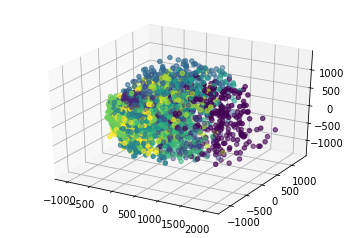

In [13]:
vector = []
k = 0
for img in range(0,3000):
    label_,pixel_ = train_data[img]
    array_pixel = [0]*(28*28)
    k = 0
    for i in range(0,27):
        for j in range(0,27):
            array_pixel[k] = pixel_[i][j]
            k+=1
    vector.append(array_pixel)
            

#PCA using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vector_reduced = pca.fit_transform(vector)

#At what dimension do we get most of the variances
pca_2 = PCA(n_components = 100)
pca_2.fit_transform(vector) 

#3D scatter plot of 30000 datapoints along with the variances explained till 3 dimensions
print sum(pca.explained_variance_ratio_),sum(pca_2.explained_variance_ratio_)

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
labels = []
label = ''
for i in range(0,3000):
    label,trash = train_data[i]
    labels.append(label)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vector_reduced[:,0], vector_reduced[:,1], vector_reduced[:,2], c=labels)
plt.show()